In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [65]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [66]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [67]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [68]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [69]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [70]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [71]:
inspector = inspect(engine)
inspector.get_columns('measurement')
inspector.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [72]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

# Exploratory Climate Analysis

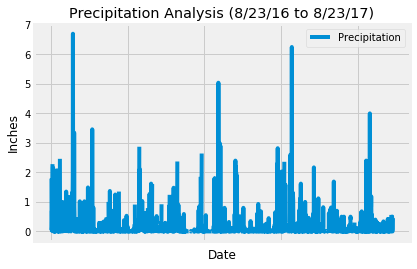

<Figure size 432x288 with 0 Axes>

In [94]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

year_ago = dt.date(2017,8,23) - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
prep = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prep_df = pd.DataFrame(prep)
prep_df.set_index('date')

# Sort the dataframe by date
prep_df = prep_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
prep_df.plot('date','prcp')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis (8/23/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.show()
# Save Figure 
plt.savefig("Images/01Precipitation Analysis.png")

In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prep_df=prep_df.rename(columns = {"date":"Date","prcp":"Precipitation"})
prep_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [75]:
# Design a query to show how many stations are available in this dataset?
how_many_station = session.query(Measurement.station).distinct().count()
how_many_station

9

In [76]:
# What are the most active stations? (i.e. what stations have the most rows)?
locations = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
most_active_station = locations[0]
print(f"The most active station is {most_active_station[0]}.")
# List the stations and the counts in descending order.
locations 

The most active station is USC00519281.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [77]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
lowest_temp = session.query(func.min(Measurement.tobs)).filter_by(station="USC00519281").all()
highest_temp= session.query(func.max(Measurement.tobs)).filter_by(station="USC00519281").all()
aver_temp= session.query(func.avg(Measurement.tobs)).filter_by(station="USC00519281").all()
print(f"The lowest temperature was {lowest_temp} and the highest temperature was {highest_temp}. The average temperature was {aver_temp}.")

The lowest temperature was [(54.0,)] and the highest temperature was [(85.0,)]. The average temperature was [(71.66378066378067,)].


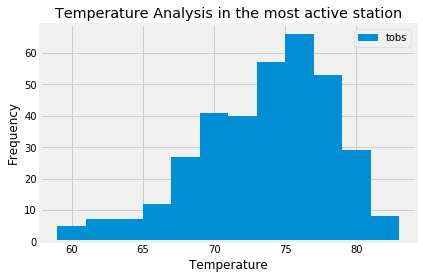

<Figure size 432x288 with 0 Axes>

In [99]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(Measurement.tobs).filter(Measurement.date > year_ago).filter(Measurement.station=="USC00519281").all()

temp_df=pd.DataFrame(temp)
temp_df.plot = plt.hist(temp_df['tobs'],12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Analysis in the most active station')
plt.legend(['tobs'])
plt.show()
# Save Figure 
plt.savefig("Images/02Temperature Analysis.png")

In [79]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [80]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_start_date= '2017-03-01'
my_end_date = '2017-03-10'
travel_temp = calc_temps(my_start_date,my_end_date)

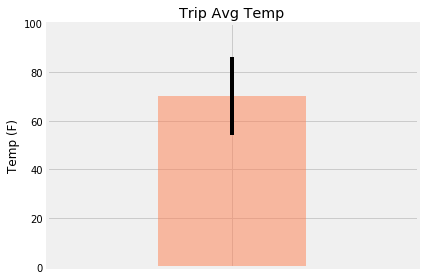

In [96]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
travel_df=pd.DataFrame(travel_temp,columns=['tmin','tavg','tmax'])
travel_df
travel_plot=plt.bar(height=travel_df['tavg'],yerr=travel_df['tmax']-travel_df['tmin'],x=1,tick_label='',color='coral',alpha=0.5)
plt.xlim(0, 2)
plt.ylim(0,100)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.tight_layout()
# Save Figure 
plt.savefig("Images/03Trip Avg Temp.png")

In [82]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# Execute the query for fileds of interest, where the Measurement and Station tables align in the station column. 
weather_results = session.query(Measurement.station,func.sum(Measurement.prcp),Station.name,Station.latitude,Station.longitude,Station.elevation)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= my_start_date)\
.filter(Measurement.date <= my_end_date)\
.group_by(Measurement.station)\
.order_by(func.sum(Measurement.prcp).desc()).all()

In [83]:
# print out the results
print(f"The previous year's matching dates are {my_start_date} to {my_end_date}." )
for i in range(len(weather_results)):
    print("-"*50)
    print(weather_results[i])
  

The previous year's matching dates are 2017-03-01 to 2017-03-10.
--------------------------------------------------
('USC00513117', 5.7299999999999995, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
--------------------------------------------------
('USC00519281', 5.390000000000001, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
--------------------------------------------------
('USC00516128', 3.5, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
--------------------------------------------------
('USC00517948', 2.98, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
--------------------------------------------------
('USC00519397', 2.7399999999999998, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
--------------------------------------------------
('USC00519523', 2.32, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
--------------------------------------------------
('USC00514830', 1.75, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -1